In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import math
import time
import seaborn as sns
import warnings
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('styles.csv', on_bad_lines='skip')
df['image'] = df.apply(lambda x: str(x['id']) + ".jpg", axis=1)
df['allFeatures'] = df['productDisplayName'] + df['gender'] + ' ' + df['masterCategory'] + ' ' + df['subCategory'] + ' ' + df['articleType'] + ' ' + df['baseColour'] + ' ' + df['season']

In [3]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,Turtle Check Men Navy Blue ShirtMen Apparel To...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,Peter England Men Party Blue JeansMen Apparel ...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,Titan Women Silver WatchWomen Accessories Watc...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,Manchester United Men Solid Black Track PantsM...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,Puma Men Grey T-shirtMen Apparel Topwear Tshir...
...,...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,Gas Men Caddy Casual ShoeMen Footwear Shoes Ca...
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,Lotto Men's Soccer Track Flip FlopMen Footwear...
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,Puma Men Graphic Stellar Blue TshirtMen Appare...
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,Rasasi Women Blue Lady PerfumeWomen Personal C...


## Предобработка данных

### Очищение данных

Были удалены все строки, у которых была хотя бы одна пустая характеристика.

In [4]:
print(df.isnull().sum())

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
image                   0
allFeatures            38
dtype: int64


In [5]:
df.dropna(axis=0, how='any', inplace=True)

In [6]:
print(df.isnull().sum())

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image                 0
allFeatures           0
dtype: int64


In [7]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,Turtle Check Men Navy Blue ShirtMen Apparel To...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,Peter England Men Party Blue JeansMen Apparel ...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,Titan Women Silver WatchWomen Accessories Watc...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,Manchester United Men Solid Black Track PantsM...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,Puma Men Grey T-shirtMen Apparel Topwear Tshir...
...,...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,Gas Men Caddy Casual ShoeMen Footwear Shoes Ca...
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,Lotto Men's Soccer Track Flip FlopMen Footwear...
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,Puma Men Graphic Stellar Blue TshirtMen Appare...
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,Rasasi Women Blue Lady PerfumeWomen Personal C...


Анализ и удаление данных, которые не связаны с одеждой.

<AxesSubplot:>

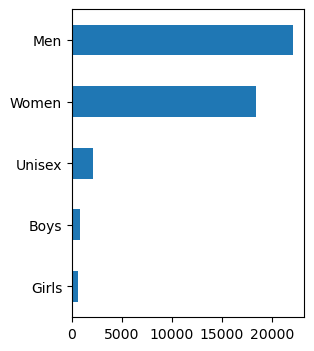

In [8]:
plt.figure(figsize=(3,4))
df.gender.value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

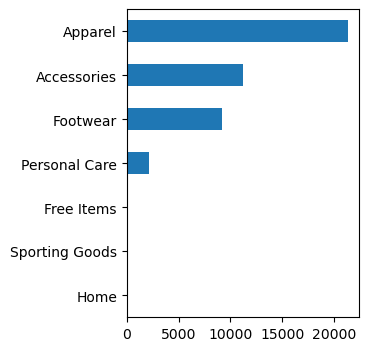

In [9]:
plt.figure(figsize=(3,4))
df.masterCategory.value_counts().sort_values().plot(kind='barh')

Удаляем категории PersonalCare, Free Items, Sporting Goods, Home

In [10]:
df = df[df['masterCategory'] != 'Personal Care']
df = df[df['masterCategory'] != 'Free Items']
df = df[df['masterCategory'] != 'Sporting Goods']
df = df[df['masterCategory'] != 'Home']
df = df.reset_index(drop=True)

In [11]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,Turtle Check Men Navy Blue ShirtMen Apparel To...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,Peter England Men Party Blue JeansMen Apparel ...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,Titan Women Silver WatchWomen Accessories Watc...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,Manchester United Men Solid Black Track PantsM...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,Puma Men Grey T-shirtMen Apparel Topwear Tshir...
...,...,...,...,...,...,...,...,...,...,...,...,...
41802,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top,42234.jpg,Sepia Women Blue Printed TopWomen Apparel Topw...
41803,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,Gas Men Caddy Casual ShoeMen Footwear Shoes Ca...
41804,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,Lotto Men's Soccer Track Flip FlopMen Footwear...
41805,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,Puma Men Graphic Stellar Blue TshirtMen Appare...


<AxesSubplot:>

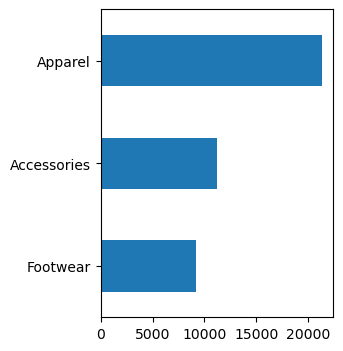

In [12]:
plt.figure(figsize=(3,4))
df.masterCategory.value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

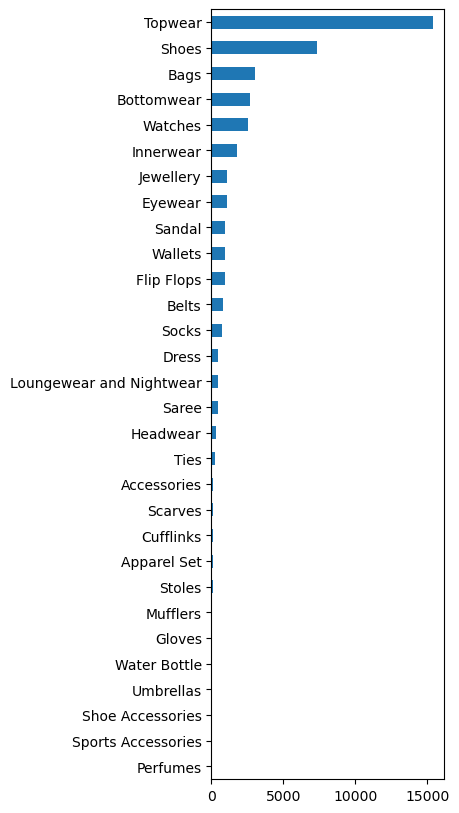

In [13]:
plt.figure(figsize=(3,10))
df.subCategory.value_counts().sort_values().plot(kind='barh')

Удаляем субкатегории Cufflinks, Water Bottle, Perfumes

In [14]:
df = df[df['subCategory'] != 'Cufflinks']
df = df[df['subCategory'] != 'Water Bottle']
df = df[df['subCategory'] != 'Perfumes']
df = df.reset_index(drop=True)

<AxesSubplot:>

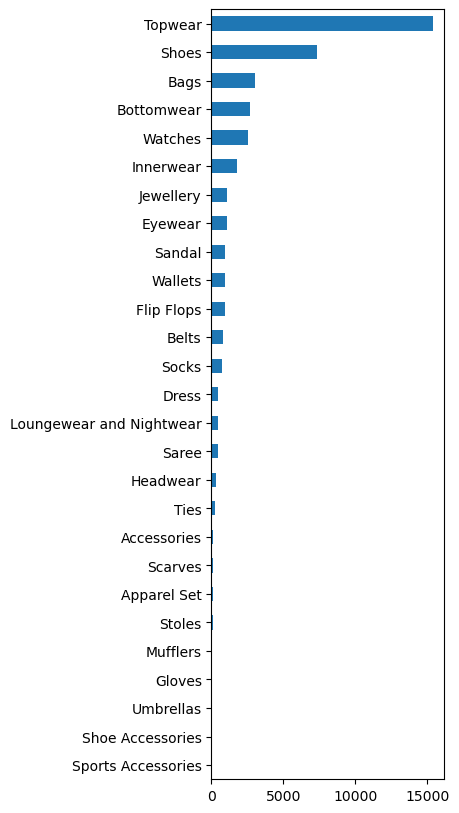

In [15]:
plt.figure(figsize=(3,10))
df.subCategory.value_counts().sort_values().plot(kind='barh')

In [16]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,Turtle Check Men Navy Blue ShirtMen Apparel To...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,Peter England Men Party Blue JeansMen Apparel ...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,Titan Women Silver WatchWomen Accessories Watc...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,Manchester United Men Solid Black Track PantsM...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,Puma Men Grey T-shirtMen Apparel Topwear Tshir...
...,...,...,...,...,...,...,...,...,...,...,...,...
41686,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top,42234.jpg,Sepia Women Blue Printed TopWomen Apparel Topw...
41687,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,Gas Men Caddy Casual ShoeMen Footwear Shoes Ca...
41688,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,Lotto Men's Soccer Track Flip FlopMen Footwear...
41689,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,Puma Men Graphic Stellar Blue TshirtMen Appare...


### NLP

Переводим все слова в нижний регистр, удаляем ненужные цифры и стоп-слова.

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
print(stop_words)

{'how', 'a', 'too', 'shan', 'that', 'won', 'there', 'once', 'him', 'isn', 'during', 'd', 'them', 'most', 'o', 'should', "it's", 'hasn', 'ma', "won't", 'at', 'other', "didn't", 'is', 'doing', 'of', 'have', "shan't", 'or', 'until', 'all', 'just', 'has', 'who', 'their', 'own', "wouldn't", 'your', 'did', 'don', 'me', 'yours', 'weren', "you'll", 'before', 'ourselves', 'very', 'so', 'up', 'had', 'such', 'm', 'my', 'we', 's', 'to', 'while', 'now', 't', 'having', "don't", 'no', 'an', 're', 'its', 'shouldn', 'are', 'but', 'both', 'each', 'out', 'what', 've', 'do', 'into', "couldn't", 'down', 'which', 'as', 'couldn', "mustn't", 'when', 'theirs', 'by', 'am', 'wasn', 'hadn', 'her', "aren't", 'i', "haven't", "she's", 'than', "you're", 'hers', 'because', 'about', 'y', 'ours', "mightn't", 'didn', 'he', 'against', 'you', 'been', 'will', 'themselves', 'itself', 'more', 'doesn', 'the', 'further', 'off', 'where', 'll', 'were', 'again', 'for', 'those', 'does', 'not', "hadn't", 'through', "should've", "isn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def text_preprocessing(text, ind, col):
    if type(text) is not str:
        print('Ошибка в названии')
    else:
        title = ""
        for words in text.split():
            word = ("".join(x for x in words if x.isalnum()))
            word = word.lower()
            if not word in stop_words:
                title += word + " "
        df[col][ind] = title     

In [19]:
for ind, row in df.iterrows():
    text_preprocessing(row['productDisplayName'], ind, 'productDisplayName')
    text_preprocessing(row['gender'], ind, 'gender')
    text_preprocessing(row['masterCategory'], ind, 'masterCategory')
    text_preprocessing(row['subCategory'], ind, 'subCategory')
    text_preprocessing(row['articleType'], ind, 'articleType')
    text_preprocessing(row['baseColour'], ind, 'baseColour')
    text_preprocessing(row['season'], ind, 'season')
    text_preprocessing(row['usage'], ind, 'usage')
    text_preprocessing(row['allFeatures'], ind, 'allFeatures')

In [20]:
df['allFeatures']

0        turtle check men navy blue shirtmen apparel to...
1        peter england men party blue jeansmen apparel ...
2        titan women silver watchwomen accessories watc...
3        manchester united men solid black track pantsm...
4        puma men grey tshirtmen apparel topwear tshirt...
                               ...                        
41686    sepia women blue printed topwomen apparel topw...
41687    gas men caddy casual shoemen footwear shoes ca...
41688    lotto mens soccer track flip flopmen footwear ...
41689    puma men graphic stellar blue tshirtmen appare...
41690    fossil women pink dial chronograph watch es305...
Name: allFeatures, Length: 41691, dtype: object

Удаляем повторяющиеся слова в allFeatures

In [21]:
def delete_duplicate():
    for i in range(len(df['allFeatures'])):
        s = df['allFeatures'][i]
        words = s.split()
        unique_words = set(words)
        df['allFeatures'][i] = " ".join(unique_words)

Леммитизация, стемминг, токенизация (отбор существительных)

In [23]:
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="english")
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


lemmer = WordNetLemmatizer()
def lemm(x):
    x = ' '.join([lemmer.lemmatize(w) for w in x.rstrip().split()])
    return x


def stemm(x):
    x = ' '.join([snowball.stem(w) for w in x.rstrip().split()])
    return x


def nouns(x):
    tk = nltk.word_tokenize(x)
    x = [word for (word, pos) in nltk.pos_tag(tk) if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')] 
    x = ' '.join(x)
    return x


df['lemmatised'] = df['allFeatures'].apply(lemm)    # lemmatise every word.
df['snow_stemmed'] = df['allFeatures'].apply(stemm) # Stem every word.
df['noun'] = df['allFeatures'].apply(nouns)    # keep nouns only

df['stem_lemm'] = df['allFeatures'].apply(lemm)   # #after lemm, apply stem
df['lemm_stem'] = df['allFeatures'].apply(stemm)    # #after stem, apply lemm

df['lemm_noun'] = df['allFeatures'].apply(nouns) #after lemm, keep noun
df['noun_lemm'] = df['allFeatures'].apply(lemm) #after nouns, apply lem

Были добавлены в датафрейм новые колонки с различными комбинациями nlp

In [31]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,15970.jpg,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,39386.jpg,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,59263.jpg,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,21379.jpg,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,53759.jpg,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41686,42234,women,apparel,topwear,tops,blue,summer,2012.0,casual,sepia women blue printed top,42234.jpg,topwomen topwear printed sepia summer tops blu...,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...
41687,17036,men,footwear,shoes,casual shoes,white,summer,2013.0,casual,gas men caddy casual shoe,17036.jpg,caddy casual men summer shoemen white shoes ga...,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...
41688,6461,men,footwear,flip flops,flip flops,red,summer,2011.0,casual,lotto mens soccer track flip flop,6461.jpg,flip lotto flopmen track summer mens soccer re...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen summer mens soccer flops,flip lotto flopmen track summer men soccer red...,flip lotto flopmen 

In [34]:
df.to_csv(r'data.csv', index= False)